# Detecção de Objetos com YOLOv5

## Introdução

Neste notebook, exploramos o uso do modelo YOLOv5 (You Only Look Once) para detecção de objetos em imagens. YOLOv5 é uma das arquiteturas mais eficientes e populares para detecção em tempo real, oferecendo alta precisão com baixa latência.

A detecção de objetos é um dos pilares da Visão Computacional moderna, com aplicações em segurança, veículos autônomos, monitoramento e muito mais.

Neste estudo, utilizamos a versão pequena do YOLOv5 (`yolov5s`) diretamente do repositório oficial da Ultralytics. A imagem usada como teste é a clássica `lena.jpg`, e o objetivo é ilustrar como detectar objetos automaticamente e visualizar os resultados com o OpenCV e o Matplotlib.

---

## Etapas do notebook

1. **Carregamento do modelo YOLOv5s via PyTorch Hub**
2. **Carregamento e visualização da imagem `lena.jpg`**
3. **Detecção de objetos utilizando o modelo**
4. **Exibição do resultado salvo automaticamente na pasta `runs/detect/exp/`**
5. **Visualização final da imagem com as caixas delimitadoras (bounding boxes)**

---

## Observações

- O modelo é carregado automaticamente do repositório da Ultralytics com o comando `torch.hub.load`.
- A primeira execução realiza o download dos pesos, podendo demorar alguns segundos.
- A imagem de saída é salva automaticamente na pasta `runs/detect/exp/` com as detecções sobrepostas.
- Utilizamos o comando `IPython.display.display()` para visualizar corretamente a imagem no Jupyter Notebook.

---


### 📦 Instalação dos requisitos

In [2]:
# Instalar YOLOv5 e dependências (executar no terminal do ambiente)
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
# %cd ..

C:\Users\Jorge Maques\Documents\Especialista_em_AI\EAI_06_Visao_Computacional\Fundamentos_OpenCV\yolov5


Cloning into 'yolov5'...


  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------ --------- 0.8/1.0 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 2.8 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [ultralytics-thop]
   ---------------------------------------- 0/3 [ultralytics-thop]
   ------------- -------------------------- 1/3 [thop]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   -------------------------- ------------- 2/3 [ultralytics]
   ------------

### 🚀 Importação de bibliotecas

In [27]:
import torch
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import os

### 🔍 Carregar modelo pré-treinado

In [28]:
# Carregar o modelo YOLOv5s (small, mais rápido)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', trust_repo=True)

Using cache found in C:\Users\Jorge Maques/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  30.0s
WARNING requirements: Restart runtime or rerun command for updates to take effect



YOLOv5  2025-8-4 Python-3.9.23 torch-2.7.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### 🖼️ Testar detecção em imagem local

C:\Users\Jorge Maques/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 512x512 2 persons
Speed: 31.9ms pre-process, 622.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


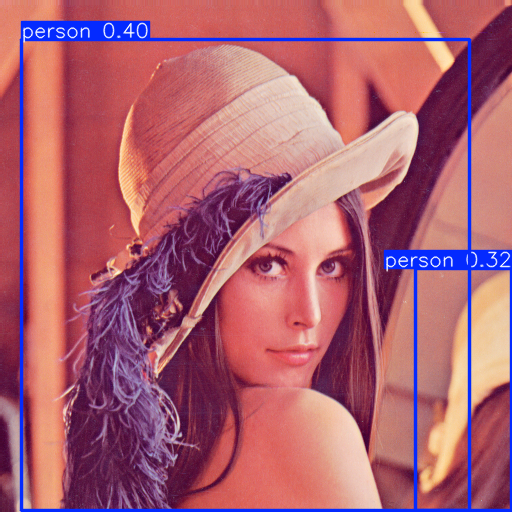

Saved 1 image to runs\detect\exp3


In [30]:
img_path = '../lena.png'  # substitua ou use um caminho local

# Download de exemplo, se necessário:
# import urllib.request
# url = 'https://ultralytics.com/images/zidane.jpg'
# urllib.request.urlretrieve(url, img_path)

# Fazer detecção
results = model(img_path)

# Mostrar resultados
results.print()             # imprime os objetos detectados
results.show()              # exibe imagem com bounding boxes
results.save() 

Esse trecho realiza a detecção em uma imagem local. O modelo identifica objetos, desenha as bounding boxes e salva a imagem com os resultados na pasta `runs/detect/`.

### 📊 Resultados detalhados

In [31]:
# Obter os resultados como dataframe
results_df = results.pandas().xyxy[0]  # coordenadas no formato (x1, y1, x2, y2)
results_df.head()

,xmin,ymin,xmax,ymax,confidence,class,name
0,21.935497,39.270435,469.529144,510.168152,0.402478,0,person
1,415.777527,268.423889,511.188385,510.096100,0.319877,0,person


Com esse código podemos explorar os resultados de forma estruturada em um DataFrame, contendo informações como classe, confiança, e coordenadas.

### 📂 Visualização com Matplotlib

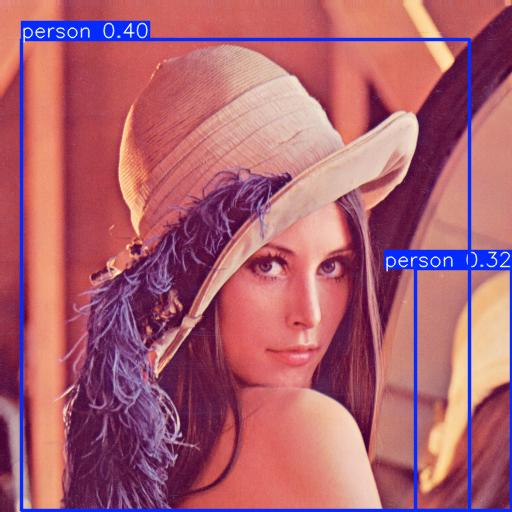

In [38]:
# Mostrar com matplotlib (caso preferir)
img_result = Image.open('runs/detect/exp/lena.jpg')
display(img_result)

## ✅ Conclusão

Neste notebook, realizamos uma introdução prática ao uso do YOLOv5 para detecção de objetos em imagens estáticas. Especificamente, aprendemos a:

- Clonar o repositório oficial do YOLOv5;
- Instalar as dependências necessárias;
- Carregar um modelo pré-treinado (YOLOv5s);
- Aplicar o modelo para detectar objetos em uma imagem local;
- Visualizar os resultados com bounding boxes;
- Salvar e explorar os dados da detecção em formato estruturado.

O YOLOv5 se destaca pela eficiência e pela facilidade de uso via PyTorch. A estrutura modular do repositório da Ultralytics permite aplicar o modelo com poucas linhas de código.